<a href="https://colab.research.google.com/github/mradulpandya/Data_Analysis/blob/main/Data_Analysis_Different_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Merge

In [ ]:
dframe1 = DataFrame({'key':['x','y','z','a','b','c'],'data_Set_1':np.arange(6)})

In [ ]:
dframe1

,key,data_Set_1
0,x,0
1,y,1
2,z,2
3,a,3
4,b,4
5,c,5


In [ ]:
dframe2 = DataFrame({'key':['x','y',' r'],'data_Set_2':[1,2,3]})

In [ ]:
dframe2

,key,data_Set_2
0,x,1
1,y,2
2,r,3


In [ ]:
pd.merge(dframe1,dframe2)

,key,data_Set_1,data_Set_2
0,x,0,1
1,y,1,2


In [ ]:
pd.merge(dframe1,dframe2, on='key', how='left')

,key,data_Set_1,data_Set_2
0,x,0,1.0
1,y,1,2.0
2,z,2,NaN
3,a,3,NaN
4,b,4,NaN
5,c,5,NaN


In [ ]:
pd.merge(dframe1,dframe2, on='key', how='right')

,key,data_Set_1,data_Set_2
0,x,0.0,1
1,y,1.0,2
2,r,NaN,3


In [ ]:
pd.merge(dframe1,dframe2, on='key', how='outer')

,key,data_Set_1,data_Set_2
0,x,0.0,1.0
1,y,1.0,2.0
2,z,2.0,NaN
3,a,3.0,NaN
4,b,4.0,NaN
5,c,5.0,NaN
6,r,NaN,3.0


In [ ]:
dframe3 = DataFrame({'key':['x','x','y','y','z','z'],'data_Set_3':range(6)})

In [ ]:
dframe3

,key,data_Set_3
0,x,0
1,x,1
2,y,2
3,y,3
4,z,4
5,z,5


In [ ]:
dframe4 = DataFrame({'key':['y','y','x','x','z'],'data_Set_4':range(5)})

In [ ]:
dframe4

,key,data_Set_4
0,y,0
1,y,1
2,x,2
3,x,3
4,z,4


In [ ]:
pd.merge(dframe3,dframe4)

,key,data_Set_3,data_Set_4
0,x,0,2
1,x,0,3
2,x,1,2
3,x,1,3
4,y,2,0
5,y,2,1
6,y,3,0
7,y,3,1
8,z,4,4
9,z,5,4


In [ ]:
dframe5 = DataFrame({'key1':['ab','cd','ef'],'key2':['gh','ij','jk'], 'data_Set_5':[10,20,30]})

In [ ]:
dframe5

,key1,key2,data_Set_5
0,ab,gh,10
1,cd,ij,20
2,ef,jk,30


In [ ]:
dframe6 = DataFrame({'key1':['ab','cd','ef','ab'],'key2':['gh','ij','jk','ij'], 'data_Set_6':[40,50,60,70]})

In [ ]:
dframe6

,key,data_Set_6
0,gh,40
1,ij,50
2,jk,60
3,ij,70


In [ ]:
pd.merge(dframe5,dframe6, on=['key1','key2'], how='outer')

,key1,key2,data_Set_5,data_Set_6
0,ab,gh,10.0,40
1,cd,ij,20.0,50
2,ef,jk,30.0,60
3,ab,ij,NaN,70


In [ ]:
pd.merge(dframe5,dframe6, on='key1', suffixes=('_lefty','_righty'))

,key1,key2_lefty,data_Set_5,key2_righty,data_Set_6
0,ab,gh,10,gh,40
1,ab,gh,10,ij,70
2,cd,ij,20,ij,50
3,ef,jk,30,jk,60


# Merge on Index

In [ ]:
dframe_left = DataFrame({'key':['x','y','z','x','y'], 'data':range(5)})

In [ ]:
dframe_left

,key,data
0,x,0
1,y,1
2,z,2
3,x,3
4,y,4


In [ ]:
dframe_right = DataFrame({'group_data':[10,20]}, index=['x','y'])

In [ ]:
dframe_right

,group_data
x,10
y,20


In [ ]:
pd.merge(dframe_left, dframe_right, left_on='key', right_index=True)

,key,data,group_data
0,x,0,10
3,x,3,10
1,y,1,20
4,y,4,20


In [ ]:
dframe_lest_hr = DataFrame({'key1':['ab','ab,','ab','cd','cd'],'key2':[10,20,30,20,30], 'data_Set_5':range(5)})

In [ ]:
dframe_lest_hr

,key1,key2,data_Set_5
0,ab,10,0
1,"ab,",20,1
2,ab,30,2
3,cd,20,3
4,cd,30,4


In [ ]:
dframe_right_hr = DataFrame(np.arange(10).reshape(5,2), index=[['cd','cd','ab','ab','cd'],[20,10,10,10,20]], columns=['col1','col2'])

In [ ]:
dframe_right_hr

col1  col2
cd 20     0     1
   10     2     3
ab 10     4     5
   10     6     7
cd 20     8     9

In [ ]:
pd.merge(dframe_lest_hr,dframe_right_hr, left_on=['key1','key2'], right_index=True)

,key1,key2,data_Set_5,col1,col2
0,ab,10,0,4,5
0,ab,10,0,6,7
3,cd,20,3,0,1
3,cd,20,3,8,9


# Concatenate

In [ ]:
arr1 = np.arange(9).reshape(3,3)

In [ ]:
arr1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
np.concatenate([arr1,arr1],axis=1)

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])

In [ ]:
np.concatenate([arr1,arr1],axis=0)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
ser1 = Series([0,1,2],index=['x','y','z'])

In [ ]:
ser1

x    0
y    1
z    2
dtype: int64

In [ ]:
ser2 = Series([3,4],index=['y','z'])

In [ ]:
pd.concat([ser1,ser2])

x    0
y    1
z    2
y    3
z    4
dtype: int64

In [ ]:
pd.concat([ser1,ser2], axis=1)

,0,1
x,0,NaN
y,1,3.0
z,2,4.0


In [ ]:
pd.concat([ser1,ser2], keys=['cat1','cat2'])

cat1  x    0
      y    1
      z    2
cat2  y    3
      z    4
dtype: int64

In [ ]:
dframe1 = DataFrame(np.random.randn(3,3), columns=['x','y','z'])

In [ ]:
dframe1

,x,y,z
0,1.325799,-0.926243,-0.920444
1,-1.961822,-0.684057,-0.913454
2,-1.103186,0.906174,-0.283436
3,-0.109898,-1.198636,-0.686956


In [ ]:
dframe2 = DataFrame(np.random.randn(3,3), columns=['a','b','z'])

In [ ]:
dframe2

,a,b,z
0,0.007455,1.073840,-1.022249
1,-0.350831,-1.375166,-0.265834
2,0.016211,0.448294,-1.008803


In [ ]:
pd.concat([dframe1,dframe2])

,x,y,z,a,b
0,1.325799,-0.926243,-0.920444,NaN,NaN
1,-1.961822,-0.684057,-0.913454,NaN,NaN
2,-1.103186,0.906174,-0.283436,NaN,NaN
3,-0.109898,-1.198636,-0.686956,NaN,NaN
0,NaN,NaN,-1.022249,0.007455,1.073840
1,NaN,NaN,-0.265834,-0.350831,-1.375166
2,NaN,NaN,-1.008803,0.016211,0.448294


In [ ]:
pd.concat([dframe1,dframe2], ignore_index=True)

,x,y,z,a,b
0,1.325799,-0.926243,-0.920444,NaN,NaN
1,-1.961822,-0.684057,-0.913454,NaN,NaN
2,-1.103186,0.906174,-0.283436,NaN,NaN
3,-0.109898,-1.198636,-0.686956,NaN,NaN
4,NaN,NaN,-1.022249,0.007455,1.073840
5,NaN,NaN,-0.265834,-0.350831,-1.375166
6,NaN,NaN,-1.008803,0.016211,0.448294


# Combine DataFrame

In [ ]:
ser1 = Series([2,np.nan,4,np.nan,6,np.nan], index=['a','b','c','d','e','f'])

In [ ]:
ser1

a    2.0
b    NaN
c    4.0
d    NaN
e    6.0
f    NaN
dtype: float64

In [ ]:
ser2 = Series(np.arange(len(ser1)), dtype=np.float64, index=['a','b','c','d','e','f'])

In [ ]:
ser2

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
f    5.0
dtype: float64

In [ ]:
Series(np.where(pd.isnull(ser1),ser2,ser1),index=ser1.index)

a    2.0
b    1.0
c    4.0
d    3.0
e    6.0
f    5.0
dtype: float64

In [ ]:
#shortcut method
ser1.combine_first(ser2)

a    2.0
b    1.0
c    4.0
d    3.0
e    6.0
f    5.0
dtype: float64

In [ ]:
dframe_odds = DataFrame({'x':[1,np.nan,3,np.nan],'y':[4,5,np.nan,np.nan],'z':[np.nan,6,7,np.nan]})

In [ ]:
dframe_odds

,x,y,z
0,1.0,4.0,NaN
1,NaN,5.0,6.0
2,3.0,NaN,7.0
3,NaN,NaN,NaN


In [ ]:
dframe_even = DataFrame({'x':[4,5,np.nan,6],'y':[np.nan,np.nan,7,8],'z':[99,np.nan,np.nan,10]})

In [ ]:
dframe_even

,x,y,z
0,4.0,NaN,99.0
1,5.0,NaN,NaN
2,NaN,7.0,NaN
3,6.0,8.0,10.0


In [ ]:
dframe_odds.combine_first(dframe_even)
                          

,x,y,z
0,1.0,4.0,99.0
1,5.0,5.0,6.0
2,3.0,7.0,7.0
3,6.0,8.0,10.0


#Reshaping

In [22]:
dframe1 = DataFrame(np.arange(8).reshape(2,4),index=pd.Index(['la','sf'], name='city'),columns=pd.Index(['a','b','c','d'],name='letter'))

In [23]:
dframe1

letter,a,b,c,d
city,,,,
la,0,1,2,3
sf,4,5,6,7


In [24]:
dframe_st = dframe1.stack()

In [25]:
dframe_st

city  letter
la    a         0
      b         1
      c         2
      d         3
sf    a         4
      b         5
      c         6
      d         7
dtype: int64

In [26]:
dframe_st.unstack()

letter,a,b,c,d
city,,,,
la,0,1,2,3
sf,4,5,6,7


In [27]:
dframe_st.unstack('city')

city,la,sf
letter,,
a,0,4
b,1,5
c,2,6
d,3,7


In [37]:
ser1 = Series([0,1,2],index=['q','x','y'])
ser2 = Series([4,5,6],index=['x','y','z'])

In [38]:
dframe = pd.concat([ser1,ser2],keys=['alpha','beta'])

In [39]:
dframe

alpha  q    0
       x    1
       y    2
beta   x    4
       y    5
       z    6
dtype: int64

In [40]:
dframe = dframe.unstack()

In [41]:
dframe

,q,x,y,z
alpha,0.0,1.0,2.0,NaN
beta,NaN,4.0,5.0,6.0


In [43]:
dframe.stack(dropna=False)

alpha  q    0.0
       x    1.0
       y    2.0
       z    NaN
beta   q    NaN
       x    4.0
       y    5.0
       z    6.0
dtype: float64

#Duplicates in Data Frames

In [46]:
dframe = DataFrame({'key1':['a']*2 + ['b']*3,'key2':[2,2,2,3,3]})

In [48]:
dframe

,key1,key2
0,a,2
1,a,2
2,b,2
3,b,3
4,b,3


In [49]:
dframe.duplicated()

0    False
1     True
2    False
3    False
4     True
dtype: bool

In [50]:
dframe.drop_duplicates()

,key1,key2
0,a,2
2,b,2
3,b,3


In [52]:
dframe.drop_duplicates(['key1'])

,key1,key2
0,a,2
2,b,2


In [53]:
dframe

,key1,key2
0,a,2
1,a,2
2,b,2
3,b,3
4,b,3



# Mapping

In [55]:
dframe = DataFrame({'city':['mumbai','dehli','ahmedabad'], 'altitude':[3535,4564,3453]})

In [56]:
dframe

,city,altitude
0,mumbai,3535
1,dehli,4564
2,ahmedabad,3453


In [57]:
state_map = {'mumbai':'maharastra','dehli':'delhi','ahmedabad':'gujrat'}

In [59]:
dframe['state_map'] = dframe['city'].map(state_map)

In [60]:
dframe

,city,altitude,state_map
0,mumbai,3535,maharastra
1,dehli,4564,delhi
2,ahmedabad,3453,gujrat


# Replace

In [63]:
ser1 = Series([1,2,3,4,1,2,3,4])

In [64]:
ser1

0    1
1    2
2    3
3    4
4    1
5    2
6    3
7    4
dtype: int64

In [65]:
ser1.replace(1,np.nan)

0    NaN
1    2.0
2    3.0
3    4.0
4    NaN
5    2.0
6    3.0
7    4.0
dtype: float64

In [66]:
ser1.replace([1,4],[100,400])

0    100
1      2
2      3
3    400
4    100
5      2
6      3
7    400
dtype: int64

In [67]:
ser1.replace({4:np.nan})

0    1.0
1    2.0
2    3.0
3    NaN
4    1.0
5    2.0
6    3.0
7    NaN
dtype: float64

# Rename Index

In [68]:
dframe = DataFrame(np.arange(12).reshape(3,4),index=['ny','la','sf'],columns=['a','b','c','d'])

In [69]:
dframe

,a,b,c,d
ny,0,1,2,3
la,4,5,6,7
sf,8,9,10,11


In [70]:
dframe.index.map(str.upper)

Index(['NY', 'LA', 'SF'], dtype='object')

In [71]:
dframe.index = dframe.index.map(str.upper)

In [72]:
dframe

,a,b,c,d
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [74]:
dframe.rename(index=str.title,columns=str.upper)

,A,B,C,D
Ny,0,1,2,3
La,4,5,6,7
Sf,8,9,10,11


In [77]:
dframe.rename(index={'NY':'NEW YORK'}, columns={'a':'ALPHA'})

,ALPHA,b,c,d
NEW YORK,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [78]:
dframe

,a,b,c,d
NY,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


In [79]:
dframe.rename(index={'NY':'NEW YORK'},inplace=True)

In [80]:
dframe

,a,b,c,d
NEW YORK,0,1,2,3
LA,4,5,6,7
SF,8,9,10,11


#Binning

In [82]:
years = [1990,1991,1992,2008,2012,2015,1987,1969,2013,2008,1999]

In [83]:
decade_bins = [1960,1970,1980,1990,2000,2010,2020]

In [84]:
decade_cat = pd.cut(years,decade_bins)

In [85]:
decade_cat

[(1980, 1990], (1990, 2000], (1990, 2000], (2000, 2010], (2010, 2020], ..., (1980, 1990], (1960, 1970], (2010, 2020], (2000, 2010], (1990, 2000]]
Length: 11
Categories (6, interval[int64]): [(1960, 1970] < (1970, 1980] < (1980, 1990] < (1990, 2000] <
                                  (2000, 2010] < (2010, 2020]]

In [86]:
decade_cat.categories

IntervalIndex([(1960, 1970], (1970, 1980], (1980, 1990], (1990, 2000], (2000, 2010], (2010, 2020]],
              closed='right',
              dtype='interval[int64]')

In [87]:
pd.value_counts(decade_cat)

(2010, 2020]    3
(1990, 2000]    3
(2000, 2010]    2
(1980, 1990]    2
(1960, 1970]    1
(1970, 1980]    0
dtype: int64

In [88]:
pd.cut(years,2,precision=1)

[(1969.0, 1992.0], (1969.0, 1992.0], (1969.0, 1992.0], (1992.0, 2015.0], (1992.0, 2015.0], ..., (1969.0, 1992.0], (1969.0, 1992.0], (1992.0, 2015.0], (1992.0, 2015.0], (1992.0, 2015.0]]
Length: 11
Categories (2, interval[float64]): [(1969.0, 1992.0] < (1992.0, 2015.0]]

In [89]:
pd.cut(years,3,precision=1)

[(1984.3, 1999.7], (1984.3, 1999.7], (1984.3, 1999.7], (1999.7, 2015.0], (1999.7, 2015.0], ..., (1984.3, 1999.7], (1969.0, 1984.3], (1999.7, 2015.0], (1999.7, 2015.0], (1984.3, 1999.7]]
Length: 11
Categories (3, interval[float64]): [(1969.0, 1984.3] < (1984.3, 1999.7] < (1999.7, 2015.0]]

# Outliners

In [90]:
np.random.seed(12345)

In [91]:
dframe = DataFrame(np.random.randn(1000,4))

In [93]:
dframe.head()

,0,1,2,3
0,-0.204708,0.478943,-0.519439,-0.555730
1,1.965781,1.393406,0.092908,0.281746
2,0.769023,1.246435,1.007189,-1.296221
3,0.274992,0.228913,1.352917,0.886429
4,-2.001637,-0.371843,1.669025,-0.438570


In [94]:
dframe.tail()

,0,1,2,3
995,1.089085,0.251232,-1.451985,1.653126
996,-0.478509,-0.010663,-1.060881,-1.502870
997,-1.946267,1.013592,0.037333,0.133304
998,-1.293122,-0.322542,-0.782960,-0.303340
999,0.089987,0.292291,1.177706,0.882755


In [95]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [96]:
col = dframe[0]

In [97]:
col.head

<bound method NDFrame.head of 0     -0.204708
1      1.965781
2      0.769023
3      0.274992
4     -2.001637
         ...   
995    1.089085
996   -0.478509
997   -1.946267
998   -1.293122
999    0.089987
Name: 0, Length: 1000, dtype: float64>

In [98]:
col[np.abs(col)>3]

523   -3.428254
900    3.366626
Name: 0, dtype: float64

In [99]:
dframe[(np.abs(dframe)>3).any(1)]

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


In [101]:
dframe[(np.abs(dframe)>3)] = np.sign(dframe)*3

In [102]:
dframe.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067623,0.068473,0.025153,-0.002081
std,0.995485,0.990253,1.003977,0.989736
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.000000,2.653656,3.000000,3.000000


# Permutation

In [103]:
dframe =DataFrame(np.arange(16).reshape(4,4))

In [104]:
dframe

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15


In [105]:
blender = np.random.permutation(4)

In [106]:
blender

array([1, 3, 2, 0])

In [107]:
dframe.take(blender)

,0,1,2,3
1,4,5,6,7
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3


In [111]:
box = np.array([1,2,3])

In [112]:
shaker = np.random.randint(0,len(box),size=10)

In [113]:
shaker

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 2])

In [114]:
hand_grabs = box.take(shaker)

In [115]:
hand_grabs

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 3])

# Grop By on Dataframes

In [117]:
dframe = DataFrame({'key1':['x','x','y','y','z'], 'key2':['alpha','beta','alpha','beta','alpha'], 'dataset1':np.random.randn(5), 'dataset2':np.random.randn(5)})

In [118]:
dframe

,key1,key2,dataset1,dataset2
0,x,alpha,0.779515,0.159703
1,x,beta,-2.453088,0.101103
2,y,alpha,0.689468,-0.087746
3,y,beta,0.280517,-0.658604
4,z,alpha,1.622469,0.497419


In [120]:
group1 = dframe['dataset1'].groupby(dframe['key1'])

In [121]:
group1

In [122]:
group1.mean()

key1
x   -0.836786
y    0.484992
z    1.622469
Name: dataset1, dtype: float64

In [123]:
cities = np.array(['ny','la','la','ny','ny'])

In [124]:
month =np.array(['jan','feb','jan','feb','jan'])

In [125]:
dframe['dataset1'].groupby([cities,month]).mean()

la  feb   -2.453088
    jan    0.689468
ny  feb    0.280517
    jan    1.200992
Name: dataset1, dtype: float64

In [126]:
dframe

,key1,key2,dataset1,dataset2
0,x,alpha,0.779515,0.159703
1,x,beta,-2.453088,0.101103
2,y,alpha,0.689468,-0.087746
3,y,beta,0.280517,-0.658604
4,z,alpha,1.622469,0.497419


In [127]:
dframe.groupby('key1').mean()

,dataset1,dataset2
key1,,
x,-0.836786,0.130403
y,0.484992,-0.373175
z,1.622469,0.497419


In [128]:
dframe.groupby(['key1','key2']).mean()

dataset1  dataset2
key1 key2                     
x    alpha  0.779515  0.159703
     beta  -2.453088  0.101103
y    alpha  0.689468 -0.087746
     beta   0.280517 -0.658604
z    alpha  1.622469  0.497419

In [135]:
dframe.groupby(['key1']).size()

key1
x    2
y    2
z    1
dtype: int64

In [136]:
dframe

,key1,key2,dataset1,dataset2
0,x,alpha,0.779515,0.159703
1,x,beta,-2.453088,0.101103
2,y,alpha,0.689468,-0.087746
3,y,beta,0.280517,-0.658604
4,z,alpha,1.622469,0.497419


In [152]:
group_dict = dict(list(dframe.groupby('key1')))

In [153]:
group_dict['x']

,key1,key2,dataset1,dataset2
0,x,alpha,0.779515,0.159703
1,x,beta,-2.453088,0.101103


In [155]:
group_dict_axis1 = dict(list(dframe.groupby(dframe.dtypes,axis=1)))

In [156]:
group_dict_axis1

{dtype('float64'):    dataset1  dataset2
 0  0.779515  0.159703
 1 -2.453088  0.101103
 2  0.689468 -0.087746
 3  0.280517 -0.658604
 4  1.622469  0.497419, dtype('O'):   key1   key2
 0    x  alpha
 1    x   beta
 2    y  alpha
 3    y   beta
 4    z  alpha}

In [158]:
dataset2_group = dframe.groupby(['key1','key2'])[['dataset2']]


In [160]:
dataset2_group.mean()

dataset2
key1 key2           
x    alpha  0.159703
     beta   0.101103
y    alpha -0.087746
     beta  -0.658604
z    alpha  0.497419

# Grouping with Dictionary and Series

In [162]:
animals = DataFrame(np.arange(16).reshape(4,4), columns = ['w','x','y','z'], index = ['dog','cat','bird','mouse'])

In [163]:
animals

,w,x,y,z
dog,0,1,2,3
cat,4,5,6,7
bird,8,9,10,11
mouse,12,13,14,15


In [168]:
animals.groupby(len).sum()

,w,x,y,z
3,4,6,8,10
4,8,9,10,11
5,12,13,14,15


In [169]:
key = ['a','b','a','b']

In [171]:
animals.groupby([len,key]).max()

w   x   y   z
3 a   0   1   2   3
  b   4   5   6   7
4 a   8   9  10  11
5 b  12  13  14  15

In [3]:
hier_col = pd.MultiIndex.from_arrays([['ny','ny','ny','sf','sf'],[1,2,3,1,2]], names=['city','sub_values'])

In [6]:
dframe_hr = DataFrame(np.arange(25).reshape(5,5), columns=hier_col)

In [7]:
dframe_hr = dframe_hr * 100

In [8]:
dframe_hr

city          ny                sf      
sub_values     1     2     3     1     2
0              0   100   200   300   400
1            500   600   700   800   900
2           1000  1100  1200  1300  1400
3           1500  1600  1700  1800  1900
4           2000  2100  2200  2300  2400

# Data Aggregation

In [9]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'

In [11]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [13]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
dframe_wine['alcohol']


0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

In [15]:
dframe_wine['alcohol'].mean()

10.422983114446502

In [16]:
def max_to_min(arr):
  return arr.max() - arr.min()

In [17]:
wino = dframe_wine.groupby('quality')

In [18]:
wino.describe()

fixed acidity                           ... alcohol                      
                count      mean       std  min  ...     25%     50%     75%   max
quality                                         ...                              
3                10.0  8.360000  1.770875  6.7  ...   9.725   9.925  10.575  11.0
4                53.0  7.779245  1.626624  4.6  ...   9.600  10.000  11.000  13.1
5               681.0  8.167254  1.563988  5.0  ...   9.400   9.700  10.200  14.9
6               638.0  8.347179  1.797849  4.7  ...   9.800  10.500  11.300  14.0
7               199.0  8.872362  1.992483  4.9  ...  10.800  11.500  12.100  14.0
8                18.0  8.566667  2.119656  5.0  ...  11.325  12.150  12.875  14.0

[6 rows x 88 columns]

In [19]:
wino.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [20]:
wino.agg('mean')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [21]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [22]:
dframe_wine['qual/alc ratio'] = dframe_wine['quality'] / dframe_wine['alcohol']

In [23]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qual/alc ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [28]:
dframe_wine.pivot_table(index=['quality'])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,qual/alc ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [30]:
%matplotlib inline

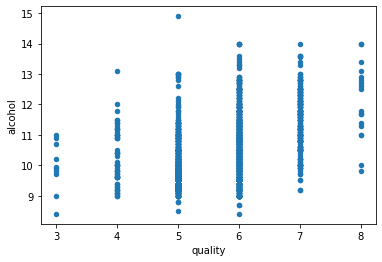

In [31]:
dframe_wine.plot(kind='scatter',x='quality',y='alcohol')

# Splting Applying & Combaining

In [32]:
dframe_wine = pd.read_csv('winequality-red.csv',sep=';')

In [33]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [34]:
def ranker(df):
  df['alc_content_rank'] = np.arange(len(df)) +1
  return df

In [36]:
dframe_wine.sort_values('alcohol', ascending= False, inplace=True)

In [37]:
dframe_wine = dframe_wine.groupby('quality').apply(ranker)

In [38]:
dframe_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,2
1270,5.0,0.38,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.0,6,3


In [40]:
  num_of_qual = dframe_wine['quality'].value_counts()

In [41]:
num_of_qual

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [42]:
dframe_wine[dframe_wine.alc_content_rank == 1].head(len(num_of_qual))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alc_content_rank
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.9,5,1
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8,1
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,1
821,4.9,0.42,0.00,2.1,0.048,16.0,42.0,0.99154,3.71,0.74,14.0,7,1
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.99340,3.90,0.56,13.1,4,1
899,8.3,1.02,0.02,3.4,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,1


# Cross Tabulation

In [45]:
from io import StringIO

In [46]:
data ="""\
Sample   Animal   Intelligence
1        Dog     Smart
2 Dog Smart
3 Cat Dumb
4 Cat Dumb
5 Dog Dumb
6 Cat Smart"""


In [53]:
dframe = pd.read_table(StringIO(data),sep='\s+')

In [54]:
dframe

,Sample,Animal,Intelligence
0,1,Dog,Smart
1,2,Dog,Smart
2,3,Cat,Dumb
3,4,Cat,Dumb
4,5,Dog,Dumb
5,6,Cat,Smart


In [56]:
pd.crosstab(dframe.Animal,dframe.Intelligence,margins=True)

Intelligence,Dumb,Smart,All
Animal,,,
Cat,2,1,3
Dog,1,2,3
All,3,3,6
